In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
(df.adult_male == (df.who == 'man')).mean()

1.0

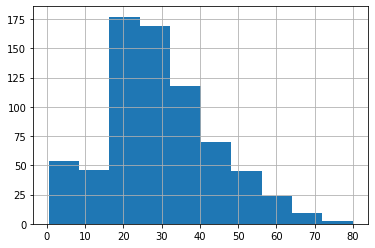

In [12]:
df.age.hist()

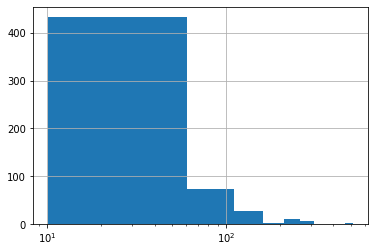

In [22]:
df.query('fare >= 10').fare.hist()
plt.xscale('log')

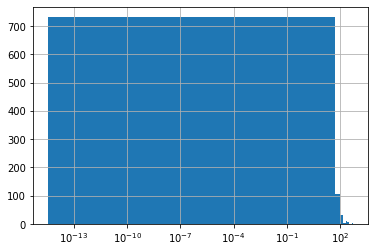

In [17]:
df.fare.hist()
plt.xscale('log')

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
pd.crosstab(df.survived, df.sex)

sex,female,male
survived,,
0,81,468
1,233,109


In [60]:
pd.crosstab(df.survived, df.who, normalize='columns')

who,child,man,woman
survived,,,
0,0.409639,0.836127,0.243542
1,0.590361,0.163873,0.756458


In [28]:
pd.crosstab(df.survived, df['class'])

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


In [36]:
df_m = df.query('sex == "female"')
pd.crosstab(df_m.survived, df_m['class'], normalize=False)

class,First,Second,Third
survived,,,
0,3,6,72
1,91,70,72


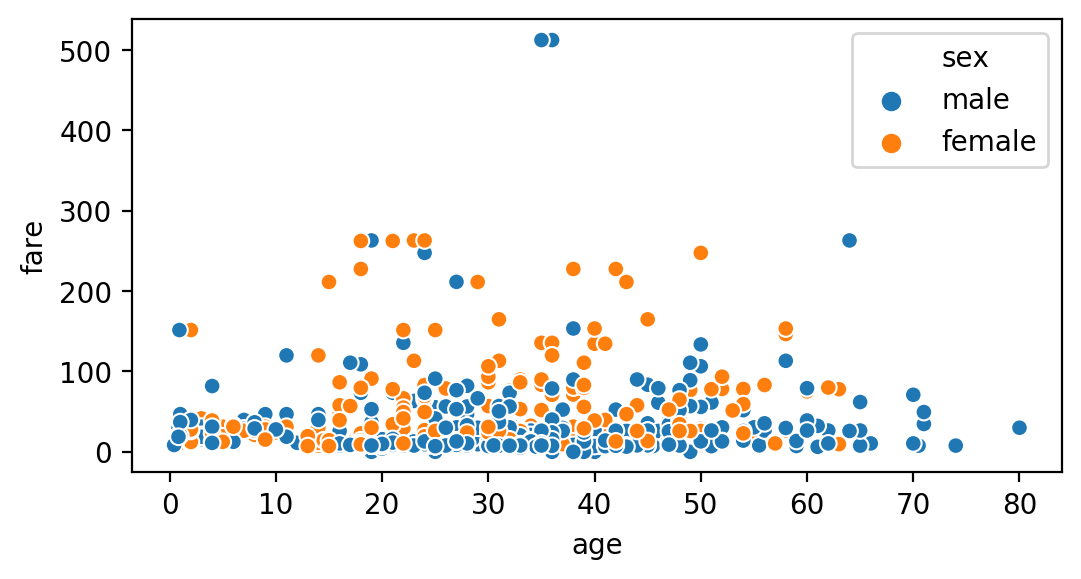

In [39]:
plt.figure(figsize=(6,3), dpi=200)
sns.scatterplot(x='age', y='fare', hue='sex', data=df)

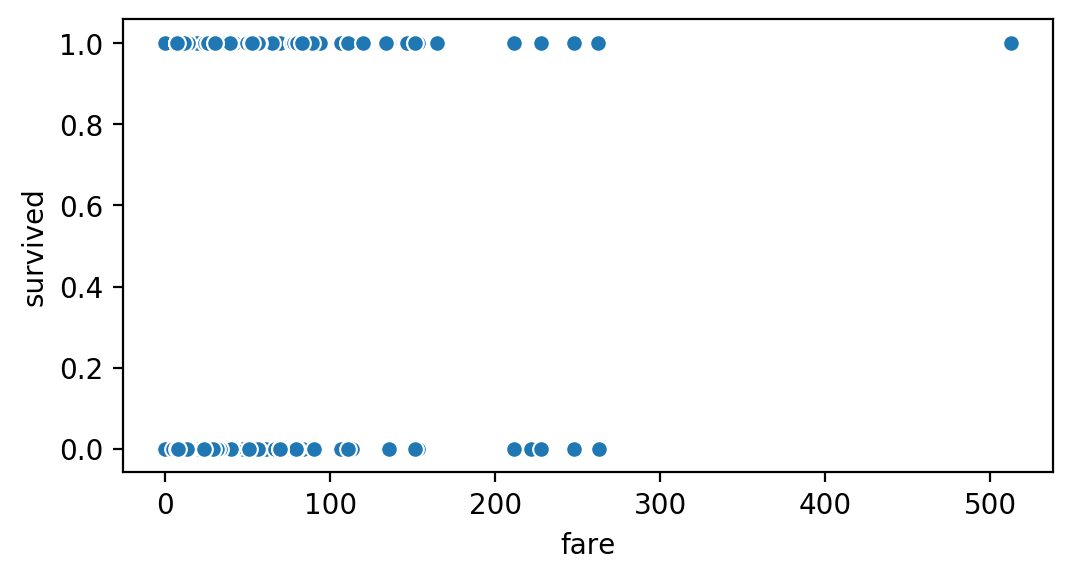

In [51]:
plt.figure(figsize=(6,3), dpi=200)
sns.scatterplot(x='fare', y='survived', data=df, x_jitter=True,  y_jitter=True)
plt.show()

In [53]:
pd.crosstab(df.embark_town, df.embarked)

embarked,C,Q,S
embark_town,,,
Cherbourg,168,0,0
Queenstown,0,77,0
Southampton,0,0,644


In [54]:
pd.crosstab(df.embark_town, df['class'])

class,First,Second,Third
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
pd.crosstab(df.who, df['class'], normalize='index')

class,First,Second,Third
who,,,
child,0.072289,0.228916,0.698795
man,0.221601,0.184358,0.594041
woman,0.335793,0.243542,0.420664


In [61]:
df2 = df.query('who == "child"')

In [62]:
pd.crosstab(df2.survived, df2.sex)

sex,female,male
survived,,
0,15,19
1,28,21


In [63]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
df.groupby('sex').age.mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

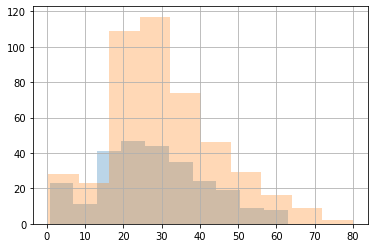

In [70]:
df.groupby('sex').age.hist(alpha=0.3)
plt.show()

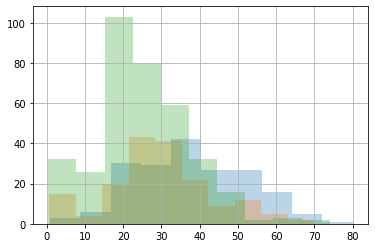

In [71]:
df.groupby('class').age.hist(alpha=0.3)
plt.show()

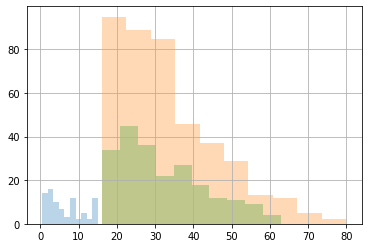

In [72]:
df.groupby('who').age.hist(alpha=0.3)
plt.show()

who
child    AxesSubplot(0.125,0.125;0.775x0.755)
man      AxesSubplot(0.125,0.125;0.775x0.755)
woman    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fare, dtype: object

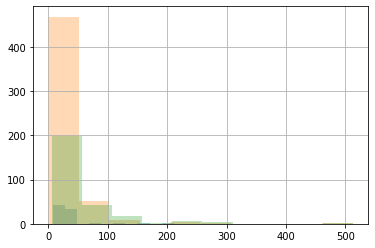

In [73]:
df.groupby('who').fare.hist(alpha=0.3)

In [76]:
df.query('parch > 2')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
86,0,3,male,16.0,1,3,34.3750,S,Third,man,True,NaN,Southampton,no,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
360,0,3,male,40.0,1,4,27.9000,S,Third,man,True,NaN,Southampton,no,False
437,1,2,female,24.0,2,3,18.7500,S,Second,woman,False,NaN,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
567,0,3,female,29.0,0,4,21.0750,S,Third,woman,False,NaN,Southampton,no,False
610,0,3,female,39.0,1,5,31.2750,S,Third,woman,False,NaN,Southampton,no,False
638,0,3,female,41.0,0,5,39.6875,S,Third,woman,False,NaN,Southampton,no,False


# Predykcja

In [77]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
(df.deck.isna()).mean()

0.7721661054994389

In [121]:
y = df.survived

In [122]:
X = df.loc[:,['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male']]

In [129]:
dummies_pclass = pd.get_dummies(df.pclass, drop_first=True)
dummies_sex = pd.get_dummies(df.sex, drop_first=True)
X = df.loc[:,['sibsp', 'parch', 'fare', 'adult_male']]
X = pd.concat([X, dummies_pclass, dummies_sex], axis = 1)

In [131]:
X.head()

,sibsp,parch,fare,adult_male,2,3,male
0,1,0,7.2500,True,0,1,1
1,1,0,71.2833,False,0,0,0
2,0,0,7.9250,False,0,1,0
3,1,0,53.1000,False,0,0,0
4,0,0,8.0500,True,0,1,1


In [132]:
# X.sex = pd.Categorical(X.sex).codes

In [133]:
# X = X.drop('age', axis=1)

In [134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
adult_male    891 non-null bool
2             891 non-null uint8
3             891 non-null uint8
male          891 non-null uint8
dtypes: bool(1), float64(1), int64(2), uint8(3)
memory usage: 24.4 KB


In [135]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [145]:
# clf = LinearSVC()
clf = DecisionTreeClassifier(max_depth= 3)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [147]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [148]:
(y_test == y_pred).mean()

0.8116591928251121

In [149]:
cross_val_score(clf, X, y)

/home/pitrosk/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.81481481, 0.83501684, 0.83501684])

In [150]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [151]:
from sklearn.tree import export_graphviz

In [152]:
export_graphviz(clf, out_file="tree2.gfz",  
                filled=True, rounded=True,
                special_characters=True)

In [153]:
X.columns

Index(['sibsp', 'parch', 'fare', 'adult_male', 2, 3, 'male'], dtype='object')

In [ ]:
X